# Import Libraries

In [2]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


In [3]:
df=pd.read_csv('Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dropna(inplace=True)

# Exploratory Data Analysis (EDA)

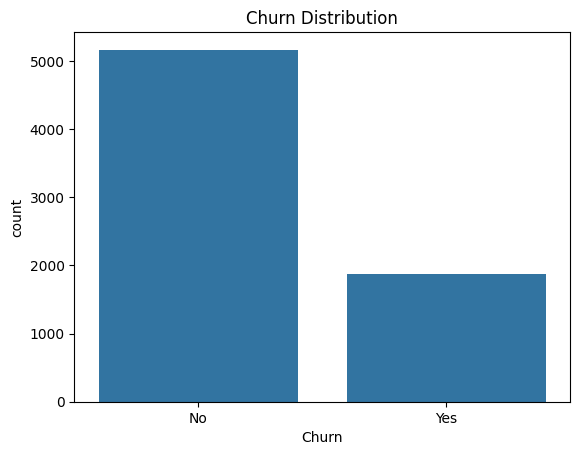

In [7]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


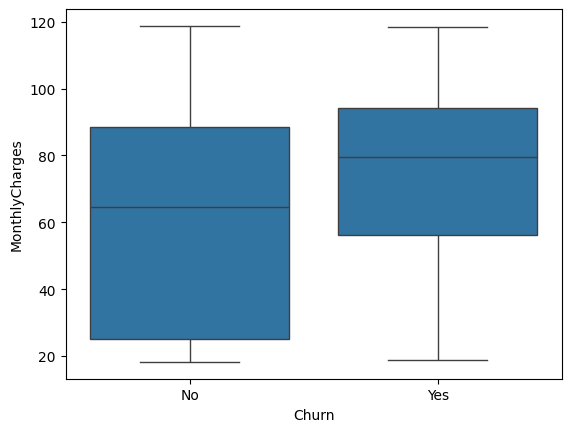

In [8]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.title=('Monthly Charges vs Churn')
plt.show()

# Statistical Hypothesis Testing

In [9]:
churned = df[df['Churn'] == 'Yes']['MonthlyCharges']
not_churned = df[df['Churn'] == 'No']['MonthlyCharges']

t_stat, p_value = stats.ttest_ind(churned, not_churned)

t_stat, p_value


(np.float64(16.47959313114872), np.float64(6.760843117980123e-60))

# Feature Engineering

In [10]:
# Convert target variable to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)


# Train-Test Split

In [11]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Logistic Regression

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [13]:
y_pred = log_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1033
           1       0.70      0.30      0.42       374

    accuracy                           0.78      1407
   macro avg       0.74      0.63      0.64      1407
weighted avg       0.77      0.78      0.74      1407

ROC AUC: 0.6251624208602741


# STATISTICAL INTERPRETATION

In [14]:
odds_ratios = pd.DataFrame({
    'Feature': X.columns,
    'OddsRatio': np.exp(log_model.coef_[0])
}).sort_values(by='OddsRatio', ascending=False)

odds_ratios.head()


,Feature,OddsRatio
7041,InternetService_Fiber optic,1.759485
7059,PaymentMethod_Electronic check,1.530078
0,SeniorCitizen,1.285843
7057,PaperlessBilling_Yes,1.284798
2,MonthlyCharges,1.279609


# Random Forest

In [15]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)


In [16]:
print(classification_report(y_test, rf_preds))


              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1033
           1       0.66      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.77      1407



# Individual Customer Churn Risk & Explanation
This section identifies high-risk customers and explains the key features contributing to their churn probability. 
We combine predicted probabilities from Logistic Regression with feature-level contributions for interpretable insights.


In [17]:
# Predict churn probabilities
churn_probabilities = log_model.predict_proba(X_test_scaled)[:, 1]

# Create a results dataframe
results = X_test.copy()
results['Churn_Probability'] = churn_probabilities
results['Actual_Churn'] = y_test.values

# Sort by highest risk
results_sorted = results.sort_values(
    by='Churn_Probability', ascending=False
)

results_sorted.head(10)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Probability,Actual_Churn
1976,1,1,93.55,93.55,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,0.917338,1
6368,1,2,94.00,181.70,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,0.913971,1
3159,1,3,94.85,335.75,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,0.909604,0
997,1,4,94.30,424.45,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,0.909400,1
5783,1,1,89.30,89.30,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,0.900554,1
3346,1,2,84.05,186.05,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,0.891666,0
1600,1,1,88.80,88.80,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,0.862765,1
3821,1,1,74.20,74.20,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,0.860134,1
3322,1,9,84.45,762.50,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,0.856783,1
2577,0,1,94.60,94.60,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,0.855687,1


The `Churn_Probability` column gives the likelihood of each customer churning. 
By sorting, we can identify the top customers at risk. These customers should be prioritized for retention strategies.


In [18]:
# Flag high-risk customers
results_sorted['High_Risk'] = results_sorted['Churn_Probability'] >= 0.7

results_sorted['High_Risk'].value_counts()


High_Risk
False    1333
True       74
Name: count, dtype: int64

In [19]:
# Get model coefficients
coefficients = pd.Series(
    log_model.coef_[0], index=X.columns
)

# Calculate contribution of each feature
contributions = X_test_scaled * coefficients.values

contrib_df = pd.DataFrame(
    contributions, columns=X.columns, index=X_test.index
)
contrib_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2481,0.574544,-0.819149,-0.324401,0.164088,0.00092,-0.001158,-0.001128,-0.001294,0.000793,0.000343,...,-0.310296,-0.085803,-0.310296,-0.103021,0.233934,-0.795134,-0.301423,0.088935,-0.304000,0.047669
6784,-0.110016,0.381082,-0.326852,0.383827,0.00092,-0.001158,-0.001128,-0.001294,0.000793,0.000343,...,-0.310296,-0.085803,-0.310296,-0.103021,0.233934,0.250361,-0.301423,0.088935,-0.304000,0.047669
6125,-0.110016,0.552543,0.306873,0.194369,0.00092,-0.001158,-0.001128,-0.001294,0.000793,0.000343,...,0.087112,0.136613,0.087112,0.160265,0.233934,0.250361,0.208350,-0.319439,-0.304000,0.047669
3052,-0.110016,-0.133303,-0.078837,0.051875,0.00092,-0.001158,-0.001128,-0.001294,0.000793,0.000343,...,0.087112,-0.085803,0.087112,-0.103021,0.233934,0.250361,0.208350,0.088935,-0.304000,-0.159068
4099,-0.110016,0.752582,-0.288036,0.448397,0.00092,-0.001158,-0.001128,-0.001294,0.000793,0.000343,...,0.087112,-0.085803,0.087112,-0.103021,0.233934,0.250361,-0.301423,0.088935,-0.304000,0.047669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,-0.110016,0.895466,-0.373023,0.478603,0.00092,-0.001158,-0.001128,-0.001294,0.000793,0.000343,...,-0.310296,-0.085803,-0.310296,-0.103021,0.233934,0.250361,-0.301423,0.088935,-0.304000,-0.159068
5250,-0.110016,0.581120,0.243950,0.233707,0.00092,-0.001158,-0.001128,-0.001294,0.000793,0.000343,...,0.087112,0.136613,0.087112,0.160265,0.233934,0.250361,-0.301423,0.088935,0.595053,0.047669
5465,-0.110016,0.181043,-0.070665,0.153174,0.00092,-0.001158,-0.001128,-0.001294,0.000793,0.000343,...,0.087112,-0.085803,0.087112,-0.103021,-0.870918,0.250361,0.208350,0.088935,-0.304000,-0.159068
5851,0.574544,-0.076149,0.376742,-0.331124,0.00092,-0.001158,-0.001128,-0.001294,0.000793,0.000343,...,0.087112,0.136613,0.087112,0.160265,-0.870918,0.250361,0.208350,0.088935,-0.304000,0.047669


In [20]:
def explain_customer(customer_id, top_n=5):
    customer_contrib = contrib_df.loc[customer_id]
    return customer_contrib.sort_values(ascending=False).head(top_n)

# Example: explain highest-risk customer
explain_customer(results_sorted.index[0])


tenure                            0.895466
InternetService_Fiber optic       0.638120
PaymentMethod_Electronic check    0.595053
SeniorCitizen                     0.574544
TotalCharges                      0.462800
Name: 1976, dtype: float64

In [21]:
def customer_summary(customer_id):
    summary = results_sorted.loc[customer_id]
    reasons = explain_customer(customer_id)
    
    return summary[['Churn_Probability', 'High_Risk']], reasons

customer_summary(results_sorted.index[0])


(Churn_Probability    0.917338
 High_Risk                True
 Name: 1976, dtype: object,
 tenure                            0.895466
 InternetService_Fiber optic       0.638120
 PaymentMethod_Electronic check    0.595053
 SeniorCitizen                     0.574544
 TotalCharges                      0.462800
 Name: 1976, dtype: float64)

# Feature Importance

In [27]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
)

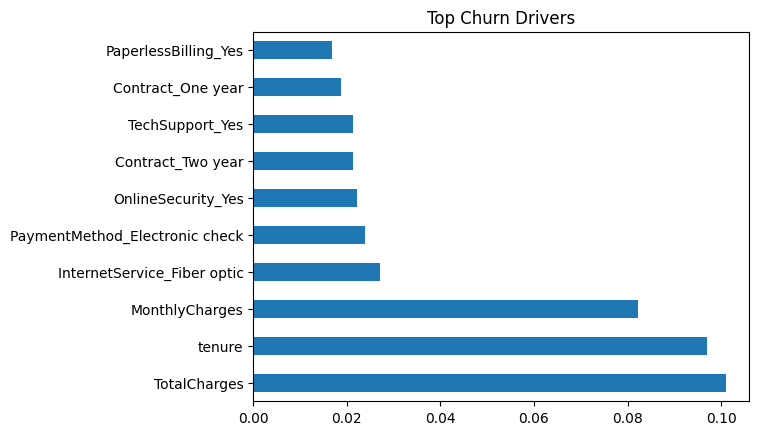

In [28]:

fig, ax = plt.subplots()

importances.nlargest(10).plot(kind='barh', ax=ax)
ax.set_title("Top Churn Drivers")

plt.show()

